In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/diabetes_data.csv')
df = utils.clean_data(df)
X_train, X_test, y_train, y_test = utils.split_data(df)

## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

results_lr = pd.DataFrame()
for c in [0.001, 0.01, 0.1, 1, 10 , 100]:
    
    lr_model = LogisticRegression(max_iter=100, random_state=42, C=c)
    lr_model.fit(X_train, y_train)
    lr_metrics = utils.evaluate_model(lr_model, X_test, y_test, False, False)
    lr_metrics['Model'] = 'LogisticRegression'
    lr_metrics['C'] = c
    print('Using C:', c, '.....')
    df_lr = pd.DataFrame([lr_metrics])
    results_lr = pd.concat([results_lr, df_lr])
    for feature, coef in zip(df.columns, lr_model.coef_[0]):
        print(f'\t{feature}: {coef}')
    print()
    

results_lr



Using C: 0.001 .....
	age: 0.012189517394886905
	gender: 0.040692281340557884
	polyuria: 0.06343650912052941
	polydipsia: 0.060635032474932786
	sudden_weight_loss: 0.04176310640186889
	weakness: 0.019667641907545583
	polyphagia: 0.025223375057295293
	genital_thrush: 0.011070969250881779
	visual_blurring: 0.01993760750617924
	itching: -0.004916475596294789
	irritability: 0.024173991576166044
	delayed_healing: 0.0009864198190398439
	partial_paresis: 0.03685652036432929
	muscle_stiffness: 0.006230832602574247
	alopecia: -0.026667595610337026
	obesity: 0.00326328182064411

Using C: 0.01 .....
	age: 0.004295812277551606
	gender: 0.2737258217119623
	polyuria: 0.4277757037061664
	polydipsia: 0.39860728362745595
	sudden_weight_loss: 0.2615282378216891
	weakness: 0.11043111090684808
	polyphagia: 0.14357685487092597
	genital_thrush: 0.1015818932313009
	visual_blurring: 0.11376608055216524
	itching: -0.05534232617714832
	irritability: 0.1693818083351564
	delayed_healing: -0.020262591102606618
	pa

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,accuracy,precision,recall,f1_score,roc_auc,Model,C
0,0.683,0.466,0.683,0.554,0.856,LogisticRegression,0.001
0,0.904,0.903,0.904,0.903,0.955,LogisticRegression,0.010
0,0.904,0.906,0.904,0.905,0.962,LogisticRegression,0.100
0,0.923,0.923,0.923,0.922,0.971,LogisticRegression,1.000
0,0.923,0.923,0.923,0.922,0.977,LogisticRegression,10.000
0,0.923,0.923,0.923,0.922,0.977,LogisticRegression,100.000


## Discriminant Analysis

### LDA

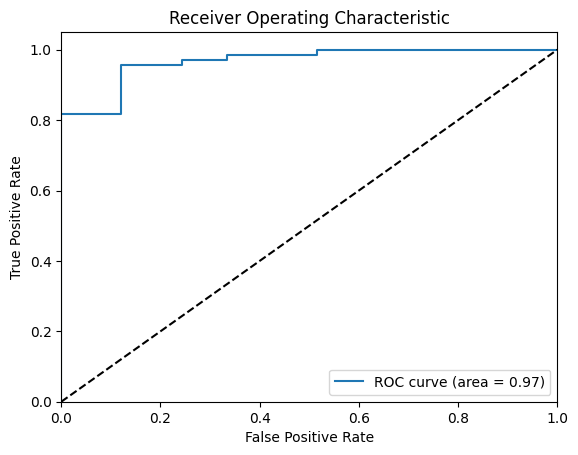

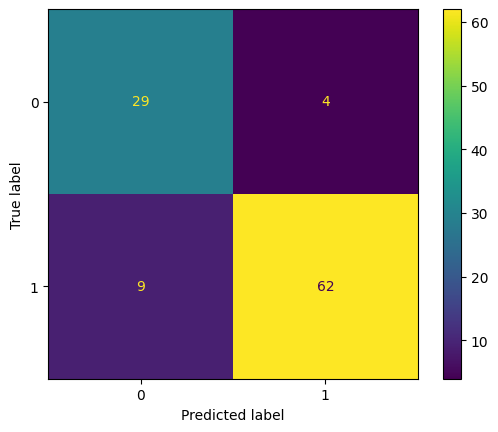

,accuracy,precision,recall,f1_score,roc_auc,Model
0,0.875,0.883,0.875,0.877,0.968,LinearDiscriminantAnalysis


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
lda_metrics = utils.evaluate_model(lda_model, X_test, y_test, True, True)
lda_metrics['Model'] = 'LinearDiscriminantAnalysis'
results_da = pd.DataFrame([lda_metrics])
results_da

In [64]:
for feature, coef in zip(df.columns, lda_model.coef_[0]):
        print(f'\t{feature}: {coef}')

	age: -0.014863821953004838
	gender: 3.040107293962727
	polyuria: 3.951542213374365
	polydipsia: 3.180618439395473
	sudden_weight_loss: 1.0036212913404854
	weakness: 0.49706252263396633
	polyphagia: 0.4288760934843352
	genital_thrush: 2.259738509148042
	visual_blurring: 0.8321751460277369
	itching: -1.3036818484339072
	irritability: 1.7685351722511031
	delayed_healing: -1.059962971198933
	partial_paresis: 1.0477491620348907
	muscle_stiffness: -0.48210535961317247
	alopecia: -0.003344079291353433
	obesity: -0.3669419875890664


### QDA

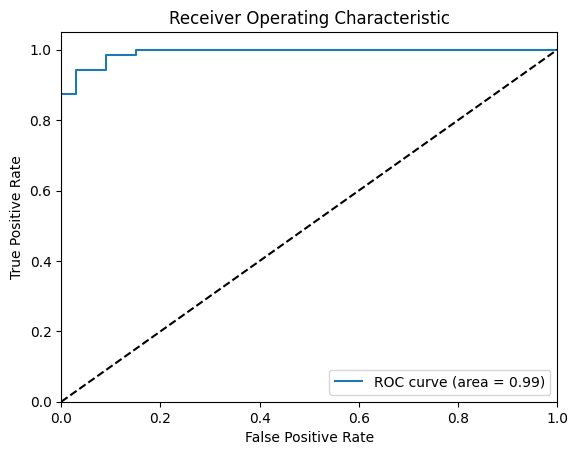

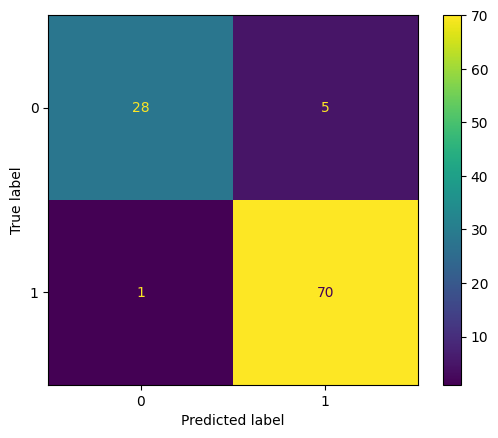

,accuracy,precision,recall,f1_score,roc_auc,Model
0,0.875,0.883,0.875,0.877,0.968,LinearDiscriminantAnalysis
0,0.942,0.944,0.942,0.941,0.992,QuadraticDiscriminantAnalysis


In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)
qda_metrics = utils.evaluate_model(qda_model, X_test, y_test, True, True)
qda_metrics['Model'] = 'QuadraticDiscriminantAnalysis'
results_da = pd.concat([results_da, pd.DataFrame([qda_metrics])])
results_da

## Bayesian

In [67]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
nb_metrics = utils.evaluate_model(nb_model, X_test, y_test, False, False)
nb_metrics['Model'] = 'BernoulliNB'
results_nb = pd.DataFrame([nb_metrics])
results_nb

,accuracy,precision,recall,f1_score,roc_auc,Model
0,0.837,0.851,0.837,0.84,0.951,BernoulliNB


## Meta-classifiers

In [71]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB

results_ensemble = []
base_learners = [
        ('bnb', BernoulliNB()),
        ('svm', SVC(probability=True, random_state=42)),
        ('dt', DecisionTreeClassifier(random_state=42))
    ]
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)
stack_metrics = utils.evaluate_model(stack_model, X_test, y_test, False, False)
stack_metrics['Model'] = 'StackingClassifier'
results_ensemble.append(stack_metrics)

bag_model = BaggingClassifier(estimator=BernoulliNB(), random_state=42)
bag_model.fit(X_train, y_train)
bag_metrics = utils.evaluate_model(bag_model, X_test, y_test, False, False)
bag_metrics['Model'] = 'BaggingClassifier'
results_ensemble.append(bag_metrics)

boost_model = AdaBoostClassifier(estimator=BernoulliNB(), random_state=42)
boost_model.fit(X_train, y_train)
boost_metrics = utils.evaluate_model(boost_model, X_test, y_test, False, False)
boost_metrics['Model'] = 'AdaBoostClassifier'
results_ensemble.append(boost_metrics)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_metrics = utils.evaluate_model(rf_model, X_test, y_test, False, False)
rf_metrics['Model'] = 'RandomForestClassifier'
results_ensemble.append(rf_metrics)

/Users/fedecl/MachineLearning-P1-NonProbabilisticClassifiers/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [77]:
results_ensemble = pd.DataFrame(results_ensemble)

In [79]:
results_bernoulli_meta = pd.concat([results_nb, results_ensemble])
results_bernoulli_meta

,accuracy,precision,recall,f1_score,roc_auc,Model
0,0.837,0.851,0.837,0.840,0.951,BernoulliNB
0,0.962,0.966,0.962,0.962,0.997,StackingClassifier
1,0.846,0.858,0.846,0.849,0.953,BaggingClassifier
2,0.894,0.895,0.894,0.895,0.980,AdaBoostClassifier
3,0.990,0.991,0.990,0.990,1.000,RandomForestClassifier
